<span style="font-weight: bold; font-size:40px; color:#2196F3">04-2</span>
# matplotlib 라이브러리 자유자재로 사용하기

04-1에서 앤스콤 4분할 그래프를 그릴 때 제목을 추가하기 위해 set_title 메서드를 사용했던 것을 기억하는가? 이 밖에도 matplotlib 라이브러리에는 그래프를 그리기 위한 다양한 메서드가 준비되어 있다. 지금부터 matplotlib 라이브러리에는 어떤 메서드가 있는지 실습을 통해 하나씩 알아보겠다. 더불어 고급 그래프 라이브러리인 seaborn 라이브러리도 함꼐 알아보았다.

<span style="font-weight: bold; font-size:20px; color:#2196F3">기초 그래프 그리기</span>

seaborn 라이브러리에는 tips라는 데이터 집합이 있다. tips 데이터 집합은 어떤 식당에서 팁을 지불한 손님의 정보를 모아둔 것ㅇ다. 이번 실습에서는 tips 데이터 집합을 사용해 다양한 그래프를 그려보겠다. 그래프를 이해하는 데 필요한 개념은 그래프를 그리기 전에 설명하겠다.

### 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프
1. tips 데이터 집합을 불러와 변수 tips에 저장한다. tips 데이터프레임은 지불 금액, 팁, 성별, 흡연 유무, 요일, 시간, 전체 인원 정보를 담고 있다.

In [8]:
# seaborn 불러오기
import seaborn as sns

In [9]:
tips = sns.load_dataset("tips")
print(tips.head( ))
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


2. 히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용하는 그래프이다. 이때 데이터프레임의 total_bill, tip 등의 열을 변수라고 부르기도 한다. 그리고 변수를 하나만 사용해서 그린 그래프를 '일변량 그래프'라고 부른다. 기본 틀(fig)을 마련하고 그래프 격자(axes1)를 구성하는 것까지는 앞에서 진행한 실습과 동일하다.

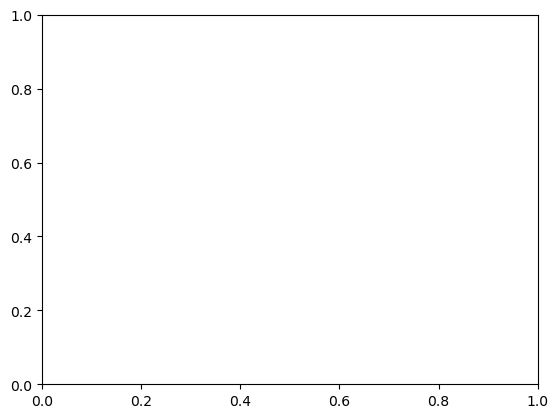

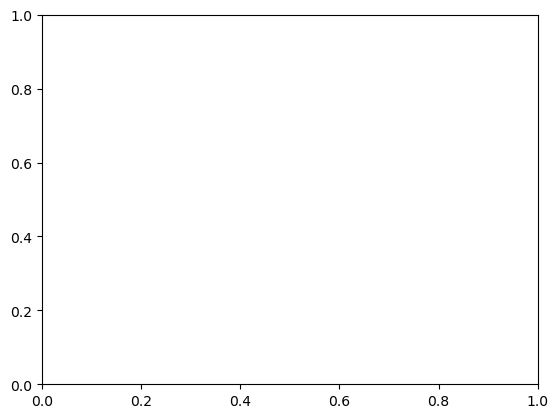

In [10]:
import matplotlib.pyplot as plt # matplotlib 불러오기
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

fig

3. hist 메서드에 total_bill 열을 전달하면 히스토그램이 만들어진다. 이때 x축의 간갹은 bins 인잣값으로 조정할 수 있다. bins 인자값을 10으로 지정하면 x축의 간격을 10으로 조정할 수 있다. 나머지는 그래프의 제목과 x, y의 제목을 추가하는 코드이다.

<IPython.core.display.Javascript object>


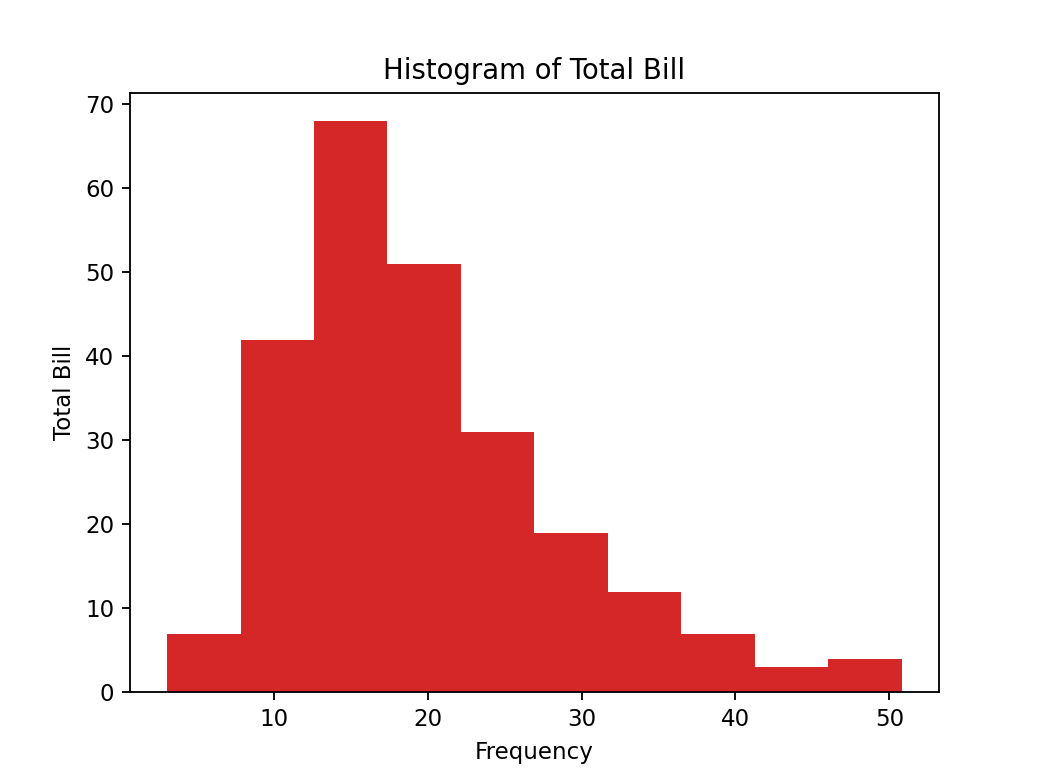

In [30]:
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

4. 이번에는 산점도 그래프를 그려보겠다. 산점도 그래프는 변수 2개를 사용해서 만드는 그래프이며 변수 2개를 사용하기 때문에 통계 용어로 '이변량 그래프'라고 부른다. 기본 틀과 그래프 격자를 만들고 scatter 메서드에 total_vivll, tips 열을 전달하면 산점도 그래프가 나타난다.

<IPython.core.display.Javascript object>


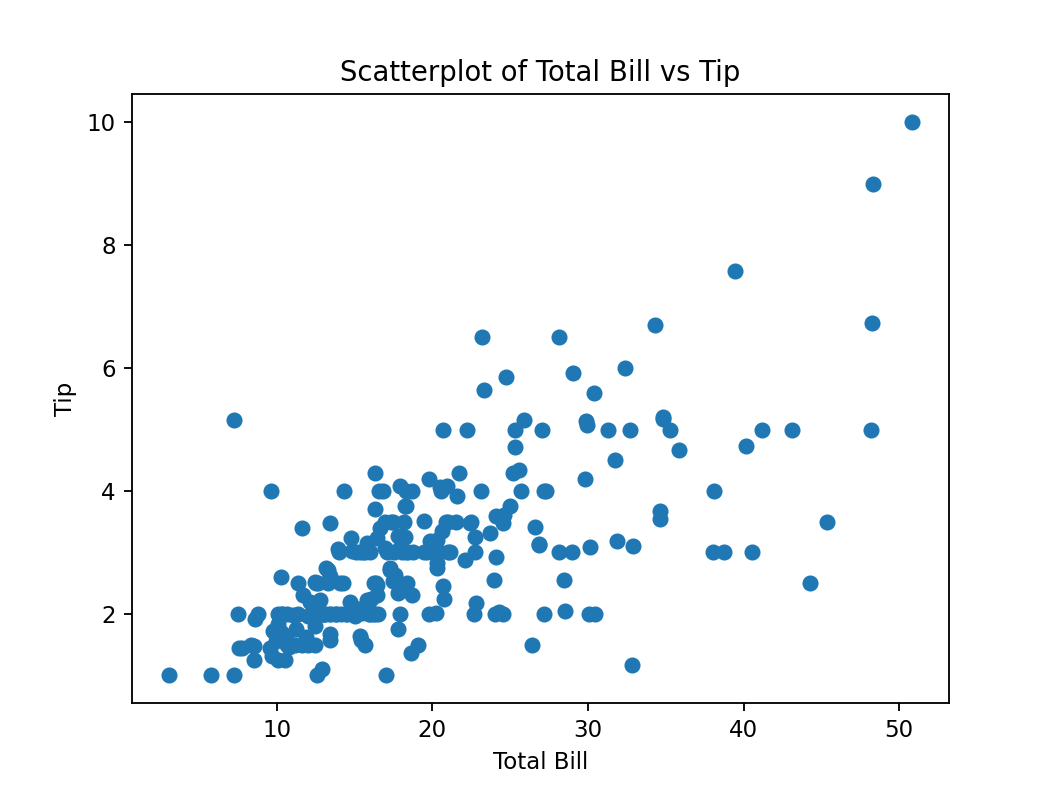

Text(0, 0.5, 'Tip')

In [31]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

5. 이번에는 박스 그래프를 그려보겠다. 박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는 그래프이다. 이산형 변수란 Female, Male과 같이 명확하게 구분되는 값을 의미하고, 연속형 변수란 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미한다. boxplot 메서드를 사용하면 박스 그래프를 그릴 수 있다. boxplot 메서드의 첫 번째 인자로 전달하는 값이 조금 복잡해 보이는데, tips 데이터프레임에서 성별이 Female인 데이터와 Male인 데이터에서 tip 열 데이터만 추출하여 리스트에 담아 전달한 것이다. 두 번째 인자에는 labels 인잣값으로 성별을 구분하기 위한 이름을 추가한다.

<IPython.core.display.Javascript object>


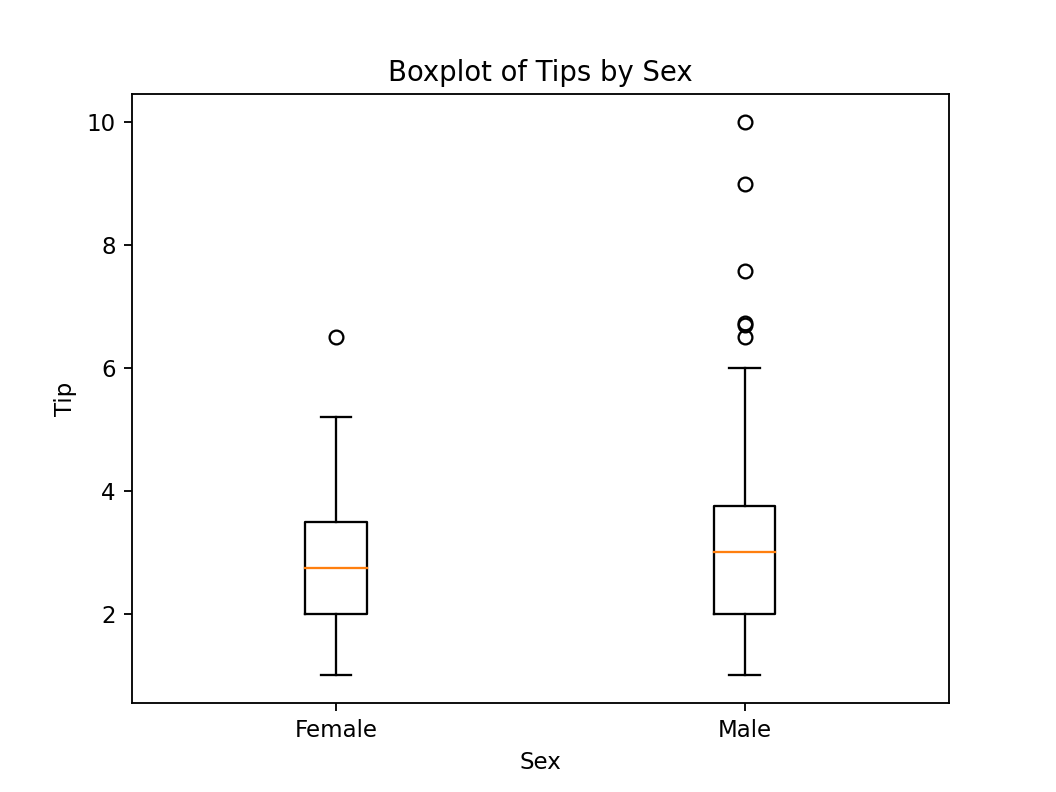

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

In [33]:
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
             tips[tips['sex'] == 'Male']['tip']],
             labels=['Female', 'Male'])

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### 다변량 그래프 그리기

앞에서 2개의 변수를 사용한 그래프를 이변량 그래프라고 했다. 그러면 3개 이상의 변수를 사용한 그래프는 무엇이라고 할까? 바로 '다변량 그래프'라고 부른다. 그러면 다변량 그래프가 왜 필요할까? 이번에는 다변량 그래프가 왜 필요한지 알아보겠다.

#### 다변량 그래프가 필요한 이유

앞에서는 지불 금액(total_bill)과 팁(tip)만을 사용하여 산점도 그래프를 그렸다. 만약 여기에 성별을 추가하여 산점도 그래프를 표현하려면 어떻게 해야 할까? 점의 색상을 다르게 하면 된다. 만약 식사 비용을 추가한다면 점의 크기를 다르게 하는 방법으로 산점도 그래프를 표현할 수 있다. 이렇게 3개 이상의 변수를 사용하는 다변량 그래프는 적재적소에 맞는 그래프 요소를 추가하여 그래프를 표현해야 한다.

#### 다변량 데이터로 다변량 그래프 그리기 - 산점도 그래프

1. 앞에서 실습한 산점도 그래프(scatter_plot)에 성별을 새 변수로 추가해 보겠다. 성별은 산점도 그래프에서 색상으로 구분하면 적당하다. 하지만 Female, Male과 같은 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용할 수 없다. 0, 1과 같은 정수를 사용해야 한다. 따라서 각 문자열을 정수로 치환하는 함수를 만들어야 한다. 다음은 여성(Femali)인 경우 0을 반환하고 남성(Male)인 경우 1을 반환하는 함수이다.

In [11]:
def recode_sex(sex):
    if sex =='Female':
        return 0
    else:
        return 1

2. 이제 recode_sex 메서드가 반환한 값(0, 1)을 데이터프레임에 추가하면 된다. 다음은 recode_sex 함수가 반환한 값(0, 1)을 데이터프레임에 sex_color 열을 새로 생성하여 추가한 것이다. 이때 sex 열에 recode_sex 함수를 브로드캐스팅하기 위하여 apply 메서드를 사용했다.

In [15]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

3. 그래프를 그리는 김에 테이블당 인원 수(size)도 산점도 그래프에 추가해보자. 테이블당 인원 수는 점의 크기로 표현하면 적당하다. 다음은 scatter 메서드에 s, c 인잣값으로 테이블당 인원 수와 성별의 치환값을 전달한 것이다.

s는 점의 크기(size)를, c는 점의 색상(color)을 의미한다. <br> alpha 인잣값을 0.5로 지정하여 점의 투명도를 보기 좋게 조절했다.

Text(0, 0.5, 'Tip')

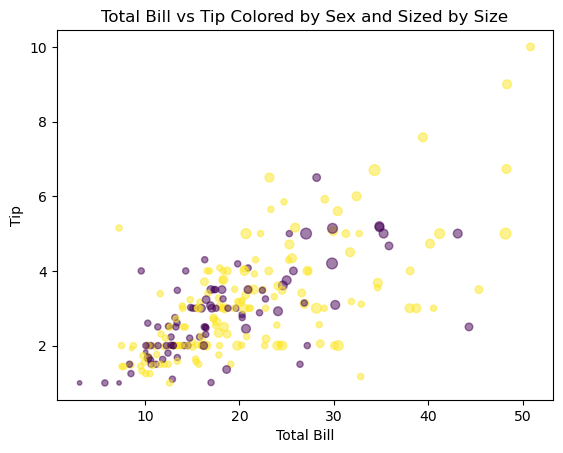

In [16]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size'] * 10,
    c=tips['sex_color'],
    alpha=0.5)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

<span style="font-weight: bold; font-size:20px; color:Gray">출처 : Do it! 데이터 분석을 위한 판다스</span>